In [4]:
import matplotlib.pyplot as plt

def get_data(file_path):
    with open(file_path) as file:
        data = file.read().split("\n")
        
        processes = {"P": dict(), "C": dict()}
        
        for element in data:
            if len(element) > 0:
                process, amount, time = element.split(" ")
                
                if amount in processes[process]:
                    processes[process][int(amount)].append(int(time))
                else:
                    processes[process][int(amount)] = [int(time)]
        
        for process, amount_time in processes.items():
            amount_average_time = dict()
            
            for amount, times in amount_time.items():
                average = sum(times) // len(times)
                amount_average_time[amount] = average

            processes[process] = amount_average_time
                
        return list(processes["P"].keys()), list(processes["P"].values()), \
                list(processes["C"].keys()), list(processes["C"].values())
    

def plot(file_path):
    _, ax = plt.subplots(1, 2, figsize=(14, 7))

    producers_amounts, producers_averages, consumers_amounts, consumers_averages = get_data(file_path)
    ax[0].scatter(producers_amounts, producers_averages)
    ax[1].scatter(consumers_amounts, consumers_averages)

    ax[0].set_title("Producers")
    ax[0].set_xlabel("Produced elements")
    ax[0].set_ylabel("Avarage time");
    ax[0].set_yscale("log")

    ax[1].set_title("Consumers")
    ax[1].set_xlabel("Consumed elements")
    ax[1].set_ylabel("Avarage time")
    ax[1].set_yscale("log")

    plt.show()

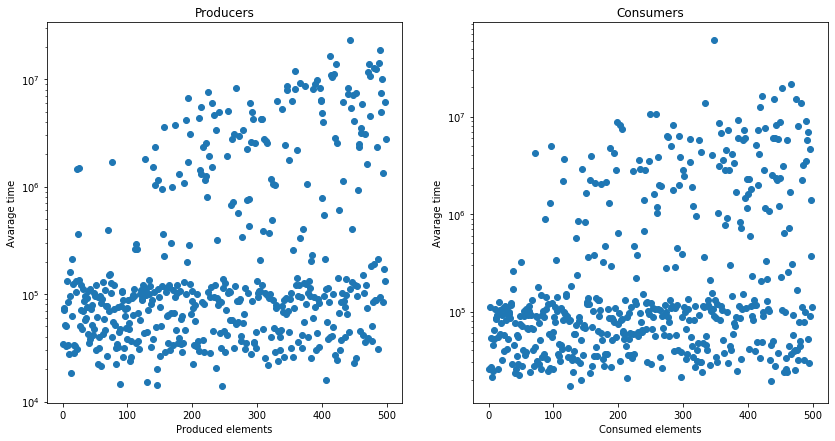

In [5]:
plot("naive/times.txt")

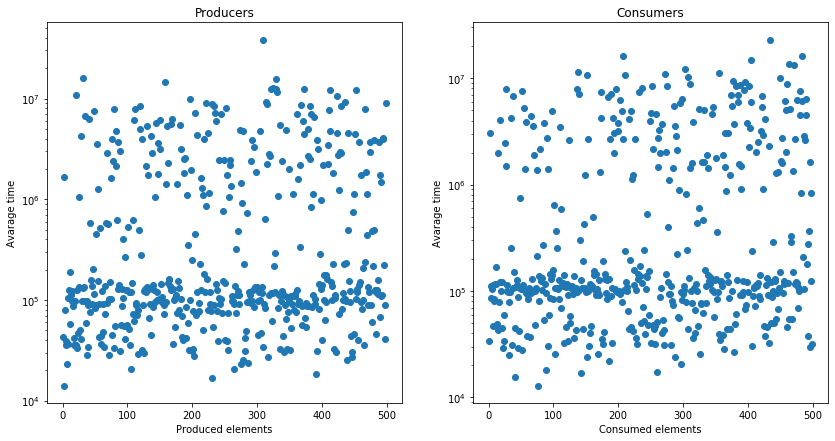

In [6]:
plot("fair/times.txt")